In [7]:
 # Import the pandas library
import pandas as pd 
from prophet import Prophet
import warnings
from prophet.plot import plot_plotly


# Load the dataset
df = pd.read_csv("C:/Users/Admin/Desktop/Test 4/demand_forecasting_data.csv")

# Display the first few rows of the dataset
df.head()

,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917


##APPLYING DATA PREPROCCESSING

In [8]:
# Convert the 'Order Date' column to datetime format
df ['Date'] = pd.to_datetime (df['Date'])
df

,Date,Product_ID,Base_Sales,Marketing_Campaign,Marketing_Effect,Seasonal_Trend,Seasonal_Effect,Price,Discount,Competitor_Price,Stock_Availability,Public_Holiday,Demand
0,2019-01-01,P002,65,Social Media,1.634270,Spring,1.0,73.496059,0.078198,64.173418,491,False,60570
1,2019-01-01,P004,94,Social Media,1.240566,Summer,1.2,74.271862,0.182151,69.571391,135,True,18143
2,2019-01-01,P003,125,Radio,1.087600,Summer,1.2,35.274616,0.102592,27.331268,180,False,37412
3,2019-01-01,P004,128,TV,1.831657,Winter,0.8,79.524248,0.196125,73.429502,227,False,40773
4,2019-01-01,P001,51,Radio,1.285161,Fall,1.1,96.237402,0.079253,88.243871,338,False,26917
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,2021-12-31,P001,185,TV,1.939151,Summer,1.2,65.233978,0.176198,56.241426,50,False,22623
34996,2021-12-31,P004,179,Radio,1.235844,Summer,1.2,59.245153,0.065713,49.730678,327,True,106278
34997,2021-12-31,P001,97,Radio,1.514377,Fall,1.1,62.664119,0.170792,53.078347,88,False,15312
34998,2021-12-31,P001,187,TV,1.981803,Spring,1.0,69.742378,0.144596,60.913845,138,False,55096


In [10]:
# Assuming you want to filter by a specific product category
category_filter = 'P002'  # Adjust this if necessary
frame = df[df['Product_ID'] == category_filter]

# Display only 'Date' and 'Price' columns
frame = frame[['Date', 'Price']]

# Rename columns to fit Prophet's requirements
frame.columns = ['ds', 'y']

# Convert 'y' to numeric values, coercing errors to NaN
frame['y'] = pd.to_numeric(frame['y'], errors='coerce')

# Drop rows with NaN values
frame = frame.dropna()

# Display the first few rows of the prepared DataFrame
print(frame.head())

           ds          y
0  2019-01-01  73.496059
5  2019-01-01  81.460038
12 2019-01-01  44.752527
20 2019-01-01  91.088278
28 2019-01-02  40.961099


##CREATING THE TIME SERIA MODEL

In [11]:
# Initialize the Prophet model and fit it to the data
m = Prophet(interval_width=0.95)
training_run = m.fit(frame)


16:18:10 - cmdstanpy - INFO - Chain [1] start processing
16:18:12 - cmdstanpy - INFO - Chain [1] done processing


##EVALUATION OF THE MORDEL

In [12]:

# Make sure 'future' is defined
future = m.make_future_dataframe(periods=30, freq='D')  # Create a DataFrame for the next 30 days

# Generate the forecast
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1120,2022-01-26,65.001083,24.289722,104.642839,65.001035,65.001146,-1.674245,-1.674245,-1.674245,-0.089811,-0.089811,-0.089811,-1.584434,-1.584434,-1.584434,0.0,0.0,0.0,63.326838
1121,2022-01-27,65.001296,21.498381,103.401871,65.001244,65.001362,-1.601133,-1.601133,-1.601133,0.031687,0.031687,0.031687,-1.632820,-1.632820,-1.632820,0.0,0.0,0.0,63.400164
1122,2022-01-28,65.001509,24.209519,106.839897,65.001454,65.001578,-1.569422,-1.569422,-1.569422,0.100100,0.100100,0.100100,-1.669522,-1.669522,-1.669522,0.0,0.0,0.0,63.432087
1123,2022-01-29,65.001723,19.838906,105.567554,65.001663,65.001794,-1.389027,-1.389027,-1.389027,0.302479,0.302479,0.302479,-1.691507,-1.691507,-1.691507,0.0,0.0,0.0,63.612695
1124,2022-01-30,65.001936,20.837977,102.640144,65.001870,65.002010,-1.622770,-1.622770,-1.622770,0.073176,0.073176,0.073176,-1.695946,-1.695946,-1.695946,0.0,0.0,0.0,63.379166


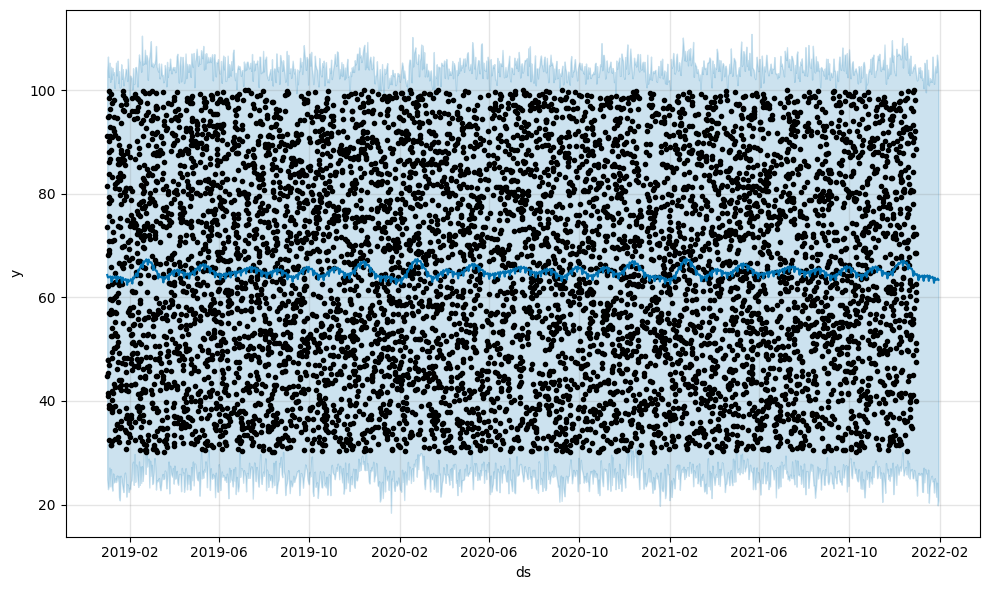

In [13]:
warnings.filterwarnings("ignore")

# Plot the forecast using Plotly
plot1 = m.plot(forecast)

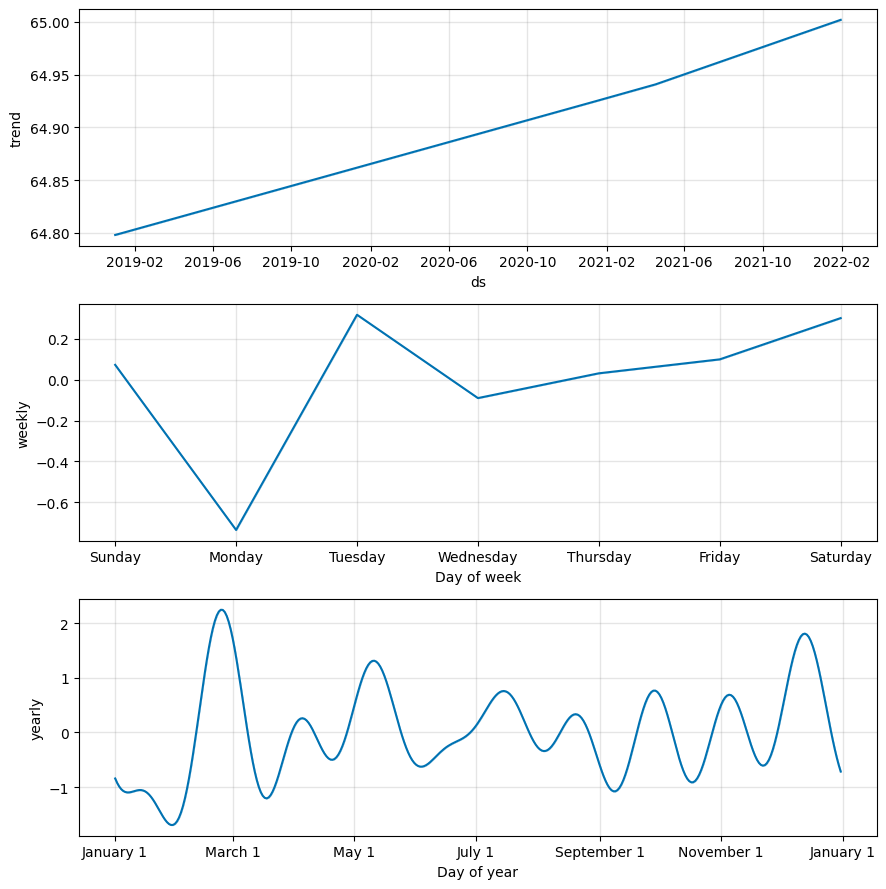

In [14]:
plot2 = m.plot_components(forecast)